# Reporte 3
## A1.3 Solución de problemas y selección de características

En este reporte se busca analizar la relación del desempeño académico de los estudiantes a partir de variables demográficas y escolares. Se comparó un modelo simple basado únicamente en las calificaciones parciales (G1 y G2) con un modelo múltiple que incorpora factores adicionales como edad, faltas y reprobadas. Los resultados muestran que el modelo múltiple ofrece una visión más completa del rendimiento, al integrar elementos que van más allá de las notas previas y reflejan hábitos de estudio y contexto escolar.

1. Se identificaron variables demográficas (edad, sexo, escuela), hábitos escolares (horas de estudio, faltas, materias reprobadas) y calificaciones parciales (G1 y G2) junto con la calificación final (G3). Esta revisión permitió que se pudieran distinguir entre variables cuantitativas y categóricas, así como reconocer que las calificaciones parciales guardan una relación estrecha con la nota final. 

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
df = pd.read_csv("Calificaciones.csv")
df.head(15)

,Escuela,Sexo,Edad,HorasDeEstudio,Reprobadas,Internet,Faltas,G1,G2,G3
0,GP,F,18,2,0,no,6,5,6,6
1,GP,F,17,2,0,yes,4,5,5,6
2,GP,F,15,2,3,yes,10,7,8,10
3,GP,F,15,3,0,yes,2,15,14,15
4,GP,F,16,2,0,no,4,6,10,10
5,GP,M,16,2,0,yes,10,15,15,15
6,GP,M,16,2,0,yes,0,12,12,11
7,GP,F,17,2,0,no,6,6,5,6
8,GP,M,15,2,0,yes,0,16,18,19
9,GP,M,15,2,0,yes,0,14,15,15


In [63]:
df.describe()

,Edad,HorasDeEstudio,Reprobadas,Faltas,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.035443,0.334177,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.839240,0.743651,8.003096,3.319195,3.761505,4.581443
min,15.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,2.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,2.000000,0.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,3.000000,75.000000,19.000000,19.000000,20.000000


In [64]:
df.dtypes

Escuela           object
Sexo              object
Edad               int64
HorasDeEstudio     int64
Reprobadas         int64
Internet          object
Faltas             int64
G1                 int64
G2                 int64
G3                 int64
dtype: object

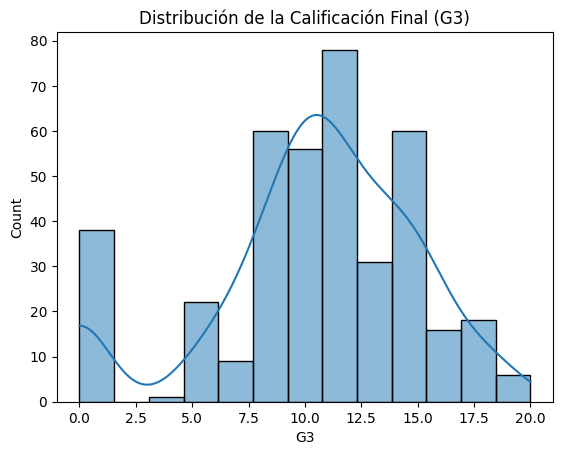

In [65]:
sns.histplot(df["G3"], kde=True)
plt.title("Distribución de la Calificación Final (G3)")
plt.show()


En la figura anterior se muestra un histograma de la calificación final (G3) muestra cómo se distribuyen las notas de los estudiantes en el curso. La mayoría de las calificaciones se concentran en un rango medio–alto, lo que indica un desempeño general aceptable, mientras que los valores extremos son menos frecuente, esto demuestra que los valores son relativamente balanceados y tiende a los valores aceptables dentro del rango de calificaciones aceptadas.

2. Se verificó que no hubiera valores nullos y las variables categóricas como sexo, escuela e internet fueron codificadas en formato numérico mediante variables de dummies, mientras que las variables numéricas se estandarizaron para evitar problemas de escala. Este proceso aseguró que el conjunto de datos estuviera listo para ser utilizado en un modelo de regresión lineal múltiple.

In [66]:
df.isnull().sum()

Escuela           0
Sexo              0
Edad              0
HorasDeEstudio    0
Reprobadas        0
Internet          0
Faltas            0
G1                0
G2                0
G3                0
dtype: int64

In [67]:
df = pd.get_dummies(df, columns=["Escuela","Sexo","Internet"], drop_first=True)


3. El análisis de correlaciones mostró una fuerte relación positiva entre las calificaciones parciales (G1 y G2) y la calificación final (G3), lo que ayuda confirmar que el desempeño previo es un buen predictor del resultado final. Por otro lado, también se observó colinealidad entre G1 y G2, lo que puede afectar la estabilidad del modelo, después con esto mismo se confirmó las relaciones negativas entre las faltas y las materias reprobadas con las calificaciones.

In [68]:
from sklearn.preprocessing import StandardScaler
num_cols = ["Edad","HorasDeEstudio","Reprobadas","Faltas","G1","G2"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

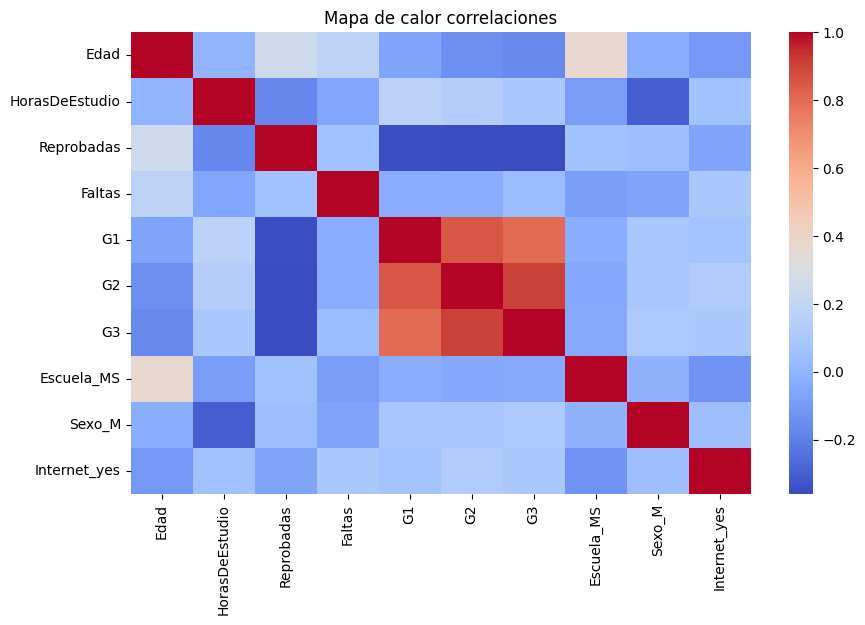

In [69]:
c= df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(c, cmap="coolwarm", annot=False)
plt.title("Mapa de calor correlaciones")
plt.show()


En la figura anterior se muestra el heatmap G1, G2 y G3 tienen correlaciones altísimas entre sí (casi 1.0). Eso confirma que las calificaciones parciales son predictores muy fuertes de la final, pero también generan colinealidad.. Con esto es posible ver que no se puede meter los 3 en el modelo ya que uede volverse inestable porque están explicando lo mismo.

In [70]:
c["G3"].sort_values(ascending=False)


G3                1.000000
G2                0.904868
G1                0.801468
Sexo_M            0.103456
Internet_yes      0.098483
HorasDeEstudio    0.097820
Faltas            0.034247
Escuela_MS       -0.045017
Edad             -0.161579
Reprobadas       -0.360415
Name: G3, dtype: float64

4. Con el uso de RFE se identificaron las variables más relevantes para la predicción de G3: edad, faltas, G1, G2 y escuela. Estas variables fueron consideradas las más informativas dentro del conjunto, aunque se observó  la conveniencia de incluir simultáneamente G1 y G2 debido a su alta colinealidad. La selección de características permitió reducir redundancias y construir un modelo que fuera más interpretable.

In [71]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.feature_selection import RFE

X = df.drop(columns=["G3"])
y = df["G3"]

model = LR()
selector = RFE(model, n_features_to_select=5)
selector.fit(X, y)

selected_features = X.columns[selector.support_]
print("Características mas apropiadas a considerar:", selected_features)


Características mas apropiadas a considerar: Index(['Edad', 'Faltas', 'G1', 'G2', 'Escuela_MS'], dtype='object')


5.  En los datos de entrenamiento alcanzó un R² de 0.837, mientras que en los datos de prueba obtuvo un R² de 0.794, lo que indica buena capacidad de generalización. El error promedio (RMSE) fue de aproximadamente 2 puntos de calificación, lo cual es aceptable en un contexto académico. Esto demuestra que el modelo puede adaptarse correctamente con la variabilidad de las calificaciones. 

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("R2 entrenamiento:", r2_score(y_train, y_pred_train))
print("R2 prueba:", r2_score(y_test, y_pred_test))
print("RMSE prueba:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

R2 entrenamiento: 0.8370726331639328
R2 prueba: 0.7935867906981908
RMSE prueba: 2.0573071266796314


**Conclusiones**: En esta actividad se demostró importancia de una adecuada preparación de los datos y de la selección de características para tener modelos que sean fáciles de interpretar. Es posible ver que aunque las calificaciones parciales son los predictores más fuertes de la nota final, variables como faltas y materias reprobadas aportan información valiosa sobre hábitos y desempeño acumulado. El modelo construido es útil y preciso, pero presenta limitaciones derivadas de la colinealidad entre G1 y G2. Futuras mejoras podrían incluir el uso de variables adicionales para tener un modelo más concreto.

**Código de Honor**: Doy mi palabra que he realizado esta actividad con integridad académica. 